In [2]:
import numpy as np
import histlite as hl
import tables
import matplotlib.pyplot as plt

In [3]:
dpsi, energy = np.load('/home/ssclafani/pone/data/dpsi_vs_energy_Nugen.npy')

In [4]:
f = tables.open_file('/home/ssclafani/pone/data/Nugen_70_Reco.hdf5')

In [5]:
nfiles = 1000
nevents = 100

In [6]:
event = f.root.I3EventHeader.cols.Event[:]
true_zenith = f.root.NuGPrimary.cols.zenith[:]
true_azimuth = f.root.NuGPrimary.cols.azimuth[:]
true_energy = f.root.NuGPrimary.cols.energy[:]
oneweight = f.root.I3MCWeightDict.cols.OneWeight[:]
ow = oneweight / (nfiles * nevents)
w_astro = 1e-18 *ow *(true_energy/1e5)**-2
#w_astro = 1e-18 *ow *(true_energy/1e5)**-2
w_atmo = 1e-18 *ow *(true_energy/1e5)**-3.7

In [7]:
len(dpsi[dpsi == 0.])

2579

In [8]:
#dpsi = np.deg2rad(.05) + (dpsi*1.05)

In [9]:
w_astro = w_astro[dpsi > 0.0]
energy = energy[dpsi > 0.0]
dpsi = dpsi[dpsi > 0.0]

In [10]:
delta_psi = 1

In [11]:
dpsi_bins = np.linspace(0, delta_psi**2, 101)

Text(0.5, 0, '$\\delta(\\psi)$ [deg]')

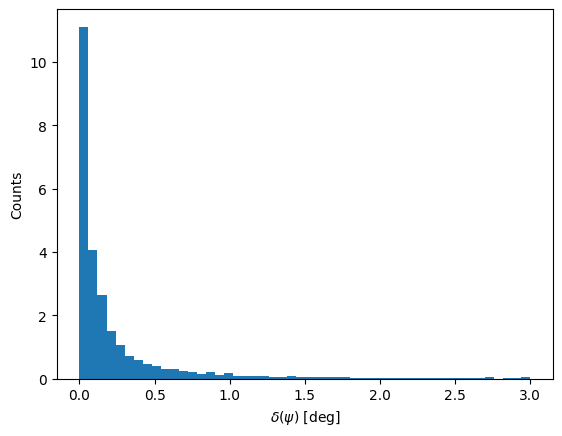

In [14]:
plt.hist(np.degrees(dpsi), weights=w_astro*86400*365, 
         bins=50, range=(0,3));
plt.ylabel('Counts')
plt.xlabel('$\delta(\psi)$ [deg]')
#plt.xlim(0,60)

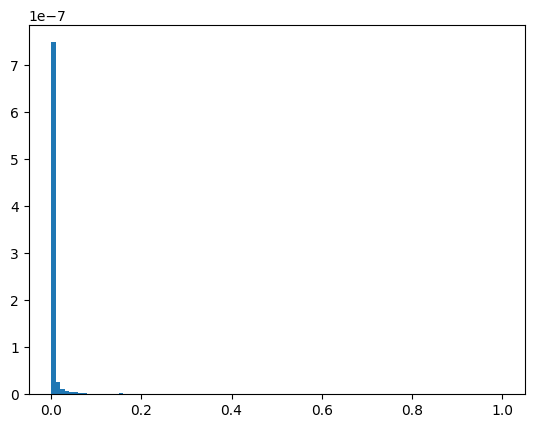

In [101]:
plt.hist(np.degrees(dpsi**2), weights=w_astro, 
         bins=100, range=(0,delta_psi**2));

In [102]:
len(dpsi_bins)

101

In [103]:
logE_reco_bins = np.arange(2, 7.02, step=0.2)

In [104]:
len(logE_reco_bins)

26

In [105]:
h = hl.hist(( np.log10(energy), 
             np.degrees(dpsi)**2), weights=w_astro,
            bins=[logE_reco_bins, dpsi_bins])
h = h.normalize(1, integrate=False)

{'colormesh': <matplotlib.collections.QuadMesh at 0x7fe7bc3efa60>,
 'colorbar': <matplotlib.colorbar.Colorbar at 0x7fe7bc331210>}

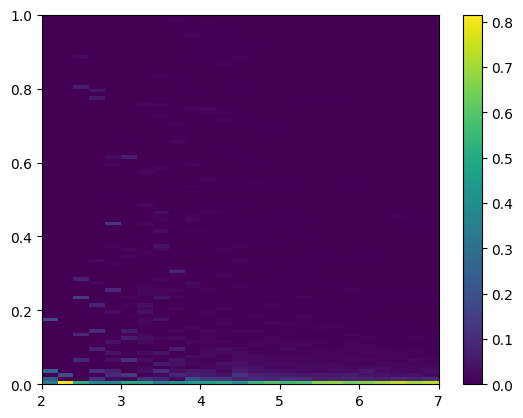

In [106]:
fig, ax = plt.subplots()
hl.plot2d(ax, h, log=False, cbar=True)
#ax.set_xlabel('logE_true')
#ax.set_ylabel('dPsi^2')

In [107]:
np.save('../data/dpsi2_vs_logenergy_1deg.npy', h)

In [108]:
h = hl.hist(( np.log10(energy), 
             np.degrees(dpsi)), weights=w_astro,
            bins=[logE_reco_bins, dpsi_bins])
h = h.normalize(1, integrate=False)

{'colormesh': <matplotlib.collections.QuadMesh at 0x7fe7bbb9e710>,
 'colorbar': <matplotlib.colorbar.Colorbar at 0x7fe7ba5a7e80>}

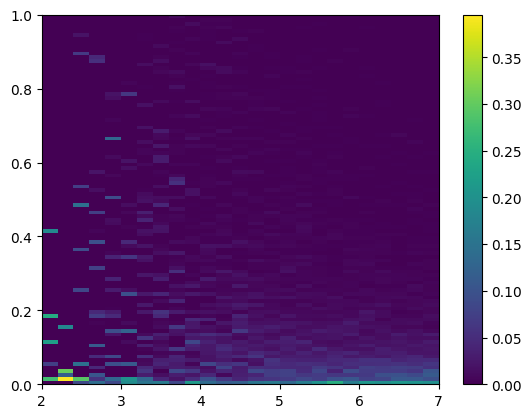

In [110]:
fig, ax = plt.subplots()
hl.plot2d(ax, h, log=False, cbar=True)
#ax.set_xlabel('logE_true')
#ax.set_ylabel('dPsi^2')

In [109]:
np.save('../data/dpsi_vs_logenergy_1deg.npy', h)